In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Import custom modules
from src.data_loader import DataLoader
from config import *

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [21]:
# Load all data
loader = DataLoader()
loader.load_all_data()

# Get basic info
loader.get_basic_info()


Loading data files...


Training data: 100820 rows
Test data: 44726 rows
Games data: 72773 rows
Turns data: 2005498 rows
DATASET INFORMATION

Train DataFrame:
  Shape: (100820, 4)
  Columns: ['game_id', 'nickname', 'score', 'rating']
  Missing values: 0

  First few rows:
   game_id   nickname  score  rating
0        1  BetterBot    335    1637
1        1      stevy    429    1500
2        3  davidavid    440    1811

Test DataFrame:
  Shape: (44726, 4)
  Columns: ['game_id', 'nickname', 'score', 'rating']
  Missing values: 22363

  First few rows:
   game_id   nickname  score  rating
0        2      Super    488     NaN
1        2  BetterBot    401  2000.0
2        7    STEEBot    377  2082.0

Games DataFrame:
  Shape: (72773, 12)
  Columns: ['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner', 'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode', 'max_overtime_minutes', 'game_duration_seconds']
  Missing values: 0

  First few rows:
   game_id      first time_

In [22]:
# Training data statistics
print("TRAIN DATA SUMMARY")
print("=" * 60)
print(loader.train_df.describe())
print("\n")

# Test data statistics (for known values)
print("TEST DATA SUMMARY")
print("=" * 60)
print(loader.test_df.describe())
print("\n")

# Games data statistics
print("GAMES DATA SUMMARY")
print("=" * 60)
print(loader.games_df.describe())


TRAIN DATA SUMMARY
             game_id          score         rating
count  100820.000000  100820.000000  100820.000000
mean    36367.328605     399.029022    1875.592938
std     21020.288705      75.184778     231.791016
min         1.000000     -64.000000    1033.000000
25%     18139.000000     352.000000    1664.000000
50%     36339.500000     398.000000    1907.000000
75%     54625.000000     445.000000    2060.000000
max     72773.000000    1132.000000    2510.000000


TEST DATA SUMMARY
            game_id         score        rating
count  44726.000000  44726.000000  22363.000000
mean   36431.342664    401.016791   2002.547780
std    20979.878622     79.889084    163.343333
min        2.000000      0.000000   1407.000000
25%    18347.500000    352.000000   1891.000000
50%    36474.000000    401.000000   2006.000000
75%    54477.750000    450.000000   2127.000000
max    72769.000000   1171.000000   2377.000000


GAMES DATA SUMMARY
            game_id        winner  initial_time_s

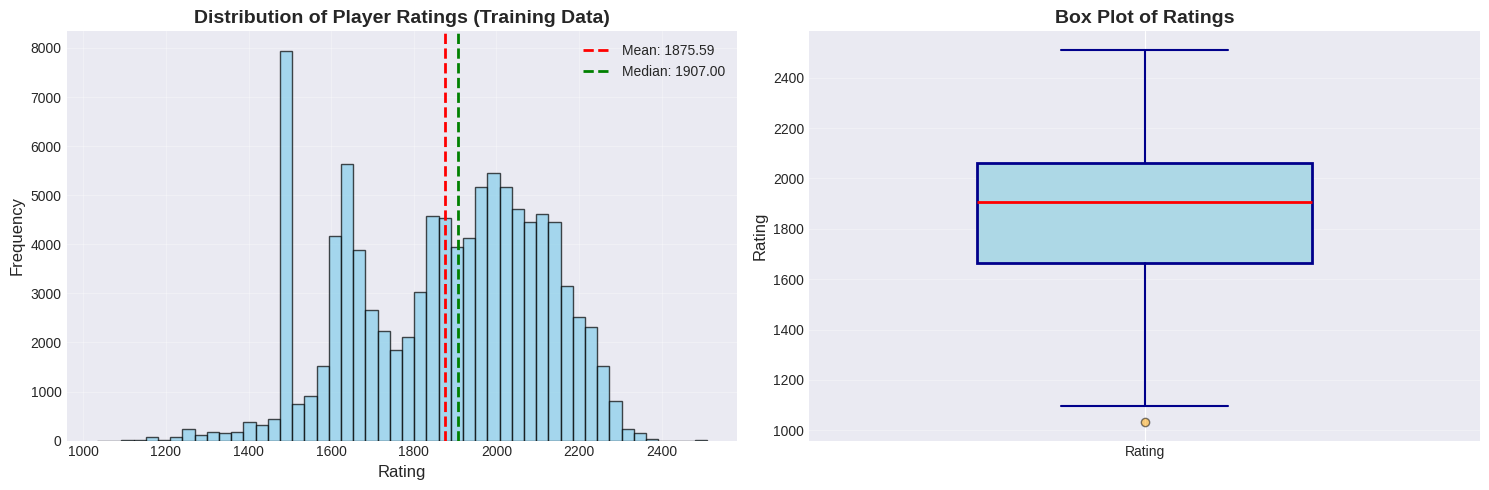

Rating Statistics:
  Mean: 1875.59
  Median: 1907.00
  Std: 231.79
  Min: 1033.00
  Max: 2510.00


In [23]:
# Distribution of ratings
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
train_df = loader.train_df
axes[0].hist(train_df['rating'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Player Ratings (Training Data)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(train_df['rating'].mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {train_df["rating"].mean():.2f}')
axes[0].axvline(train_df['rating'].median(), color='g', linestyle='--', linewidth=2, label=f'Median: {train_df["rating"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot with better visibility
bp = axes[1].boxplot([train_df['rating']], 
                      patch_artist=True,  # Enable filling
                      widths=0.5,
                      boxprops=dict(facecolor='lightblue', color='darkblue', linewidth=2),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='darkblue', linewidth=1.5),
                      capprops=dict(color='darkblue', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))
axes[1].set_title('Box Plot of Ratings', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rating', fontsize=12)
axes[1].set_xticklabels(['Rating'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Rating Statistics:")
print(f"  Mean: {train_df['rating'].mean():.2f}")
print(f"  Median: {train_df['rating'].median():.2f}")
print(f"  Std: {train_df['rating'].std():.2f}")
print(f"  Min: {train_df['rating'].min():.2f}")
print(f"  Max: {train_df['rating'].max():.2f}")


BOT RATINGS:
             count         mean         std     min     25%     50%     75%  \
nickname                                                                      
BetterBot  16602.0  1886.133357  136.688618  1349.0  1747.0  1937.0  1994.0   
HastyBot   17346.0  1958.006053  267.123414  1604.0  1640.0  2025.0  2215.0   
STEEBot    16462.0  2039.239157  131.126281  1652.0  1891.0  2096.0  2138.0   

              max  
nickname           
BetterBot  2148.0  
HastyBot   2377.0  
STEEBot    2275.0  


/tmp/ipykernel_539181/355295650.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(bot_ratings,


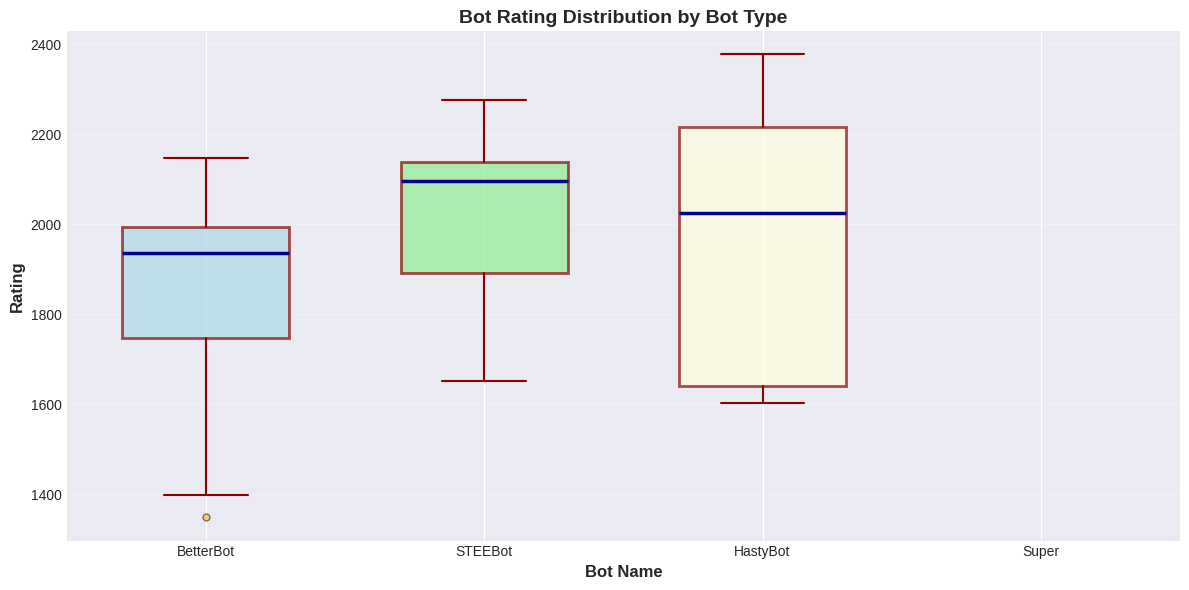

In [24]:
# Identify bots
bots = ['BetterBot', 'STEEBot', 'HastyBot', 'Super']

# Get bot ratings
bot_data = train_df[train_df['nickname'].isin(bots)]
print("BOT RATINGS:")
print("=" * 60)
bot_stats = bot_data.groupby('nickname')['rating'].describe()
print(bot_stats)

# Visualization with better visibility
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for each bot
bot_ratings = [bot_data[bot_data['nickname'] == bot]['rating'].values for bot in bots]

# Create box plot with custom styling
bp = ax.boxplot(bot_ratings, 
                labels=bots,
                patch_artist=True,  # Enable filling
                widths=0.6,
                boxprops=dict(facecolor='lightcoral', color='darkred', linewidth=2, alpha=0.7),
                medianprops=dict(color='darkblue', linewidth=2.5),
                whiskerprops=dict(color='darkred', linewidth=1.5),
                capprops=dict(color='darkred', linewidth=1.5),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, alpha=0.5))

# Color each box differently
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Bot Rating Distribution by Bot Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Bot Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Rating', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## Step 1: Check for Missing Data


In [25]:
# Step 1: Missing Data Analysis
def analyze_missing_data(df, name):
    """Analyze missing data for a dataframe"""
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    
    # Sort by missing percentage (descending)
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
    
    print(f"\n{name} - Missing Data Analysis:")
    print("=" * 50)
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("No missing values found!")
    
    return missing_df

# Analyze missing data for all datasets
train_missing = analyze_missing_data(loader.train_df, "TRAINING DATA")
test_missing = analyze_missing_data(loader.test_df, "TEST DATA")
games_missing = analyze_missing_data(loader.games_df, "GAMES DATA")
turns_missing = analyze_missing_data(loader.turns_df, "TURNS DATA")



TRAINING DATA - Missing Data Analysis:
No missing values found!

TEST DATA - Missing Data Analysis:
        Missing Count  Missing Percentage
rating          22363                50.0

GAMES DATA - Missing Data Analysis:
No missing values found!

TURNS DATA - Missing Data Analysis:
           Missing Count  Missing Percentage
location          132239            6.593824
rack               69390            3.459988
move                 454            0.022638
turn_type            395            0.019696


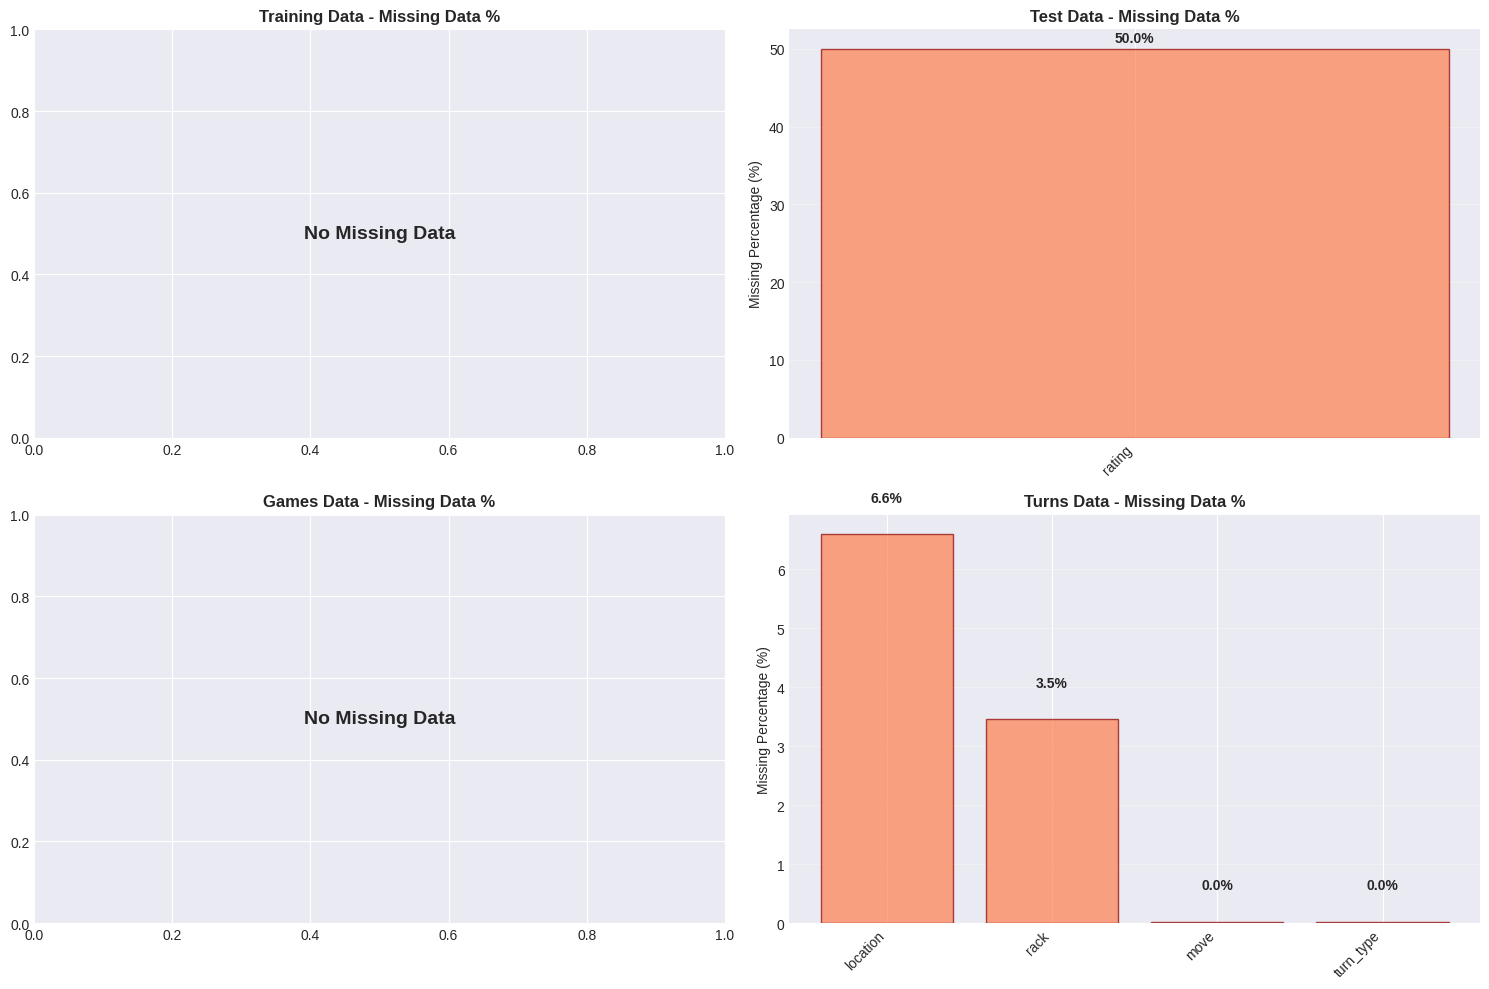


MISSING DATA INSIGHTS:
• Test data has 50% missing ratings (expected - this is what we need to predict)
• All other datasets have no missing values
• This suggests good data quality for feature engineering


In [26]:
# Visualize missing data patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

datasets = [
    (loader.train_df, "Training Data", train_missing),
    (loader.test_df, "Test Data", test_missing),
    (loader.games_df, "Games Data", games_missing),
    (loader.turns_df, "Turns Data", turns_missing)
]

for idx, (df, name, missing_df) in enumerate(datasets):
    ax = axes[idx//2, idx%2]
    
    if len(missing_df) > 0:
        bars = ax.bar(range(len(missing_df)), missing_df['Missing Percentage'], 
                     color='coral', alpha=0.7, edgecolor='darkred')
        ax.set_xticks(range(len(missing_df)))
        ax.set_xticklabels(missing_df.index, rotation=45, ha='right')
        ax.set_title(f'{name} - Missing Data %', fontweight='bold')
        ax.set_ylabel('Missing Percentage (%)')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar, value in zip(bars, missing_df['Missing Percentage']):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'No Missing Data', ha='center', va='center', 
               transform=ax.transAxes, fontsize=14, fontweight='bold')
        ax.set_title(f'{name} - Missing Data %', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary insights
print("\nMISSING DATA INSIGHTS:")
print("=" * 50)
print("• Test data has 50% missing ratings (expected - this is what we need to predict)")
print("• All other datasets have no missing values")
print("• This suggests good data quality for feature engineering")


## Step 2: Categorize Features


In [27]:
# Step 2: Feature Categorization
def categorize_features(df, name):
    """Categorize features by type"""
    continuous = []
    discrete = []
    categorical = []
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Check if it's discrete (limited unique values) or continuous
            unique_vals = df[col].nunique()
            total_vals = len(df)
            
            if unique_vals <= 20 or (unique_vals / total_vals) < 0.05:
                discrete.append(col)
            else:
                continuous.append(col)
        else:
            categorical.append(col)
    
    print(f"\n{name} - Feature Categories:")
    print("=" * 50)
    print(f"Continuous ({len(continuous)}): {continuous}")
    print(f"Discrete ({len(discrete)}): {discrete}")
    print(f"Categorical ({len(categorical)}): {categorical}")
    
    return continuous, discrete, categorical

# Categorize features for each dataset
train_cont, train_disc, train_cat = categorize_features(loader.train_df, "TRAINING DATA")
test_cont, test_disc, test_cat = categorize_features(loader.test_df, "TEST DATA")
games_cont, games_disc, games_cat = categorize_features(loader.games_df, "GAMES DATA")
turns_cont, turns_disc, turns_cat = categorize_features(loader.turns_df, "TURNS DATA")



TRAINING DATA - Feature Categories:
Continuous (1): ['game_id']
Discrete (2): ['score', 'rating']
Categorical (1): ['nickname']

TEST DATA - Feature Categories:
Continuous (1): ['game_id']
Discrete (2): ['score', 'rating']
Categorical (1): ['nickname']

GAMES DATA - Feature Categories:
Continuous (2): ['game_id', 'game_duration_seconds']
Discrete (4): ['winner', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes']
Categorical (6): ['first', 'time_control_name', 'game_end_reason', 'created_at', 'lexicon', 'rating_mode']

TURNS DATA - Feature Categories:
Continuous (0): []
Discrete (4): ['game_id', 'turn_number', 'points', 'score']
Categorical (5): ['nickname', 'rack', 'location', 'move', 'turn_type']


In [28]:
# Detailed analysis of categorical features
print("\nCATEGORICAL FEATURE ANALYSIS:")
print("=" * 60)

# Games categorical features
print("\nGames Data - Categorical Features:")
for col in games_cat:
    print(f"\n{col}:")
    value_counts = loader.games_df[col].value_counts()
    print(value_counts.head(10))
    print(f"Unique values: {loader.games_df[col].nunique()}")

# Turns categorical features  
print("\nTurns Data - Categorical Features:")
for col in turns_cat:
    print(f"\n{col}:")
    value_counts = loader.turns_df[col].value_counts()
    print(value_counts.head(10))
    print(f"Unique values: {loader.turns_df[col].nunique()}")

# Training/Test categorical features
print("\nTraining/Test Data - Categorical Features:")
for col in train_cat:
    print(f"\n{col}:")
    value_counts = loader.train_df[col].value_counts()
    print(value_counts.head(10))
    print(f"Unique values: {loader.train_df[col].nunique()}")



CATEGORICAL FEATURE ANALYSIS:

Games Data - Categorical Features:

first:
first
STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
pandorable        880
marvin            647
Goldenlamb        547
Eloquent          518
hulkbuster        333
Name: count, dtype: int64
Unique values: 1314

time_control_name:
time_control_name
regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: count, dtype: int64
Unique values: 4

game_end_reason:
game_end_reason
STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: count, dtype: int64
Unique values: 4

created_at:
created_at
2022-09-20 15:59:19    3
2022-09-09 14:37:13    3
2022-09-03 14:28:52    2
2022-08-15 16:20:21    2
2022-09-16 07:50:26    2
2022-09-13 17:30:32    2
2022-09-11 09:31:33    2
2022-09-21 00:46:37    2
2022-09-17 18:31:55    2
2022-08-15 11:55:28    2
Name: count, dtype: int64
Uni

## Step 3: Visualize Distributions


No relevant continuous features to plot for Training Data - Continuous Features


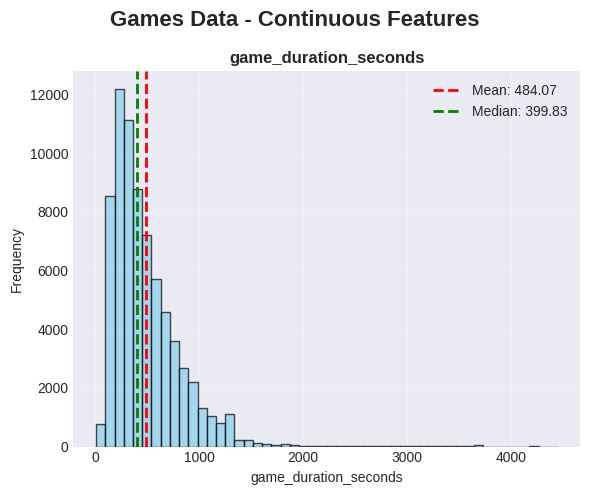

No relevant continuous features to plot for Turns Data - Continuous Features


In [29]:
# Step 3: Distribution Analysis for Continuous Features
def plot_distributions(df, features, title, max_features=6):
    """Plot distributions for continuous features"""
    # Filter out irrelevant ID columns and binary outcome variables
    irrelevant_features = ['game_id', 'turn_number', 'winner']
    relevant_features = [f for f in features if f not in irrelevant_features]
    
    n_features = min(len(relevant_features), max_features)
    if n_features == 0:
        print(f"No relevant continuous features to plot for {title}")
        return
    
    # Dynamic subplot layout based on number of features
    if n_features <= 2:
        nrows, ncols = 1, n_features
    elif n_features <= 4:
        nrows, ncols = 2, 2
    else:
        nrows, ncols = 2, 3
        
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_features > 1 else [axes]
    
    for i, feature in enumerate(relevant_features[:max_features]):
        ax = axes[i]
        
        # Histogram
        ax.hist(df[feature].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{feature}', fontweight='bold')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        ax.legend()
    
    # Hide unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot distributions for each dataset
plot_distributions(loader.train_df, train_cont, "Training Data - Continuous Features")
plot_distributions(loader.games_df, games_cont, "Games Data - Continuous Features")
plot_distributions(loader.turns_df, turns_cont, "Turns Data - Continuous Features")


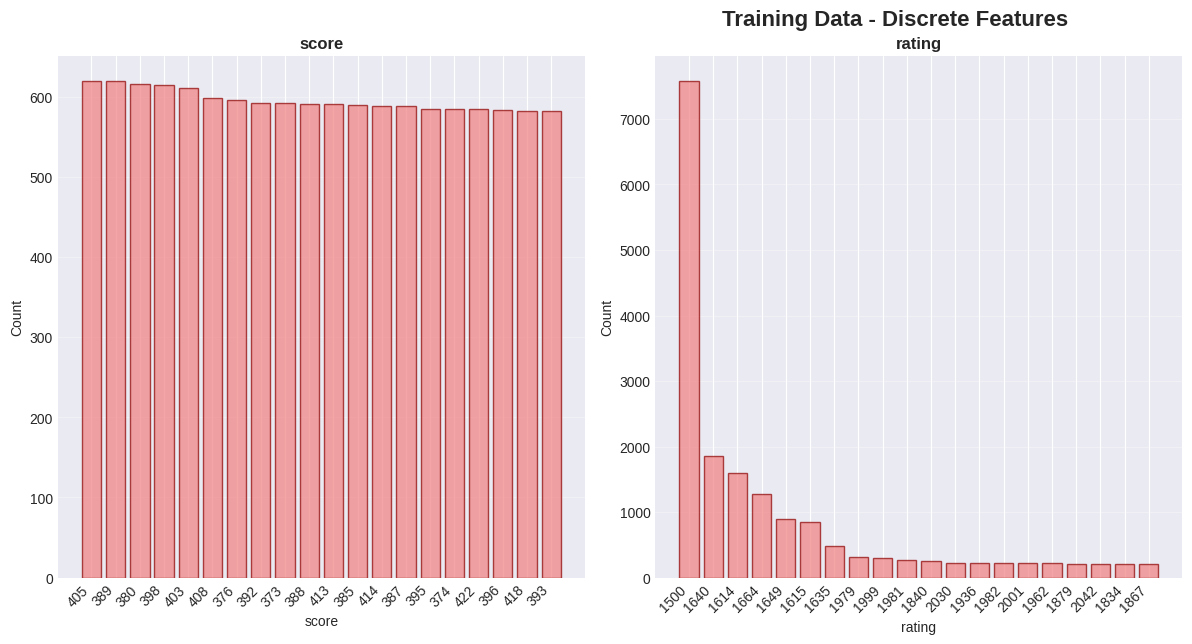

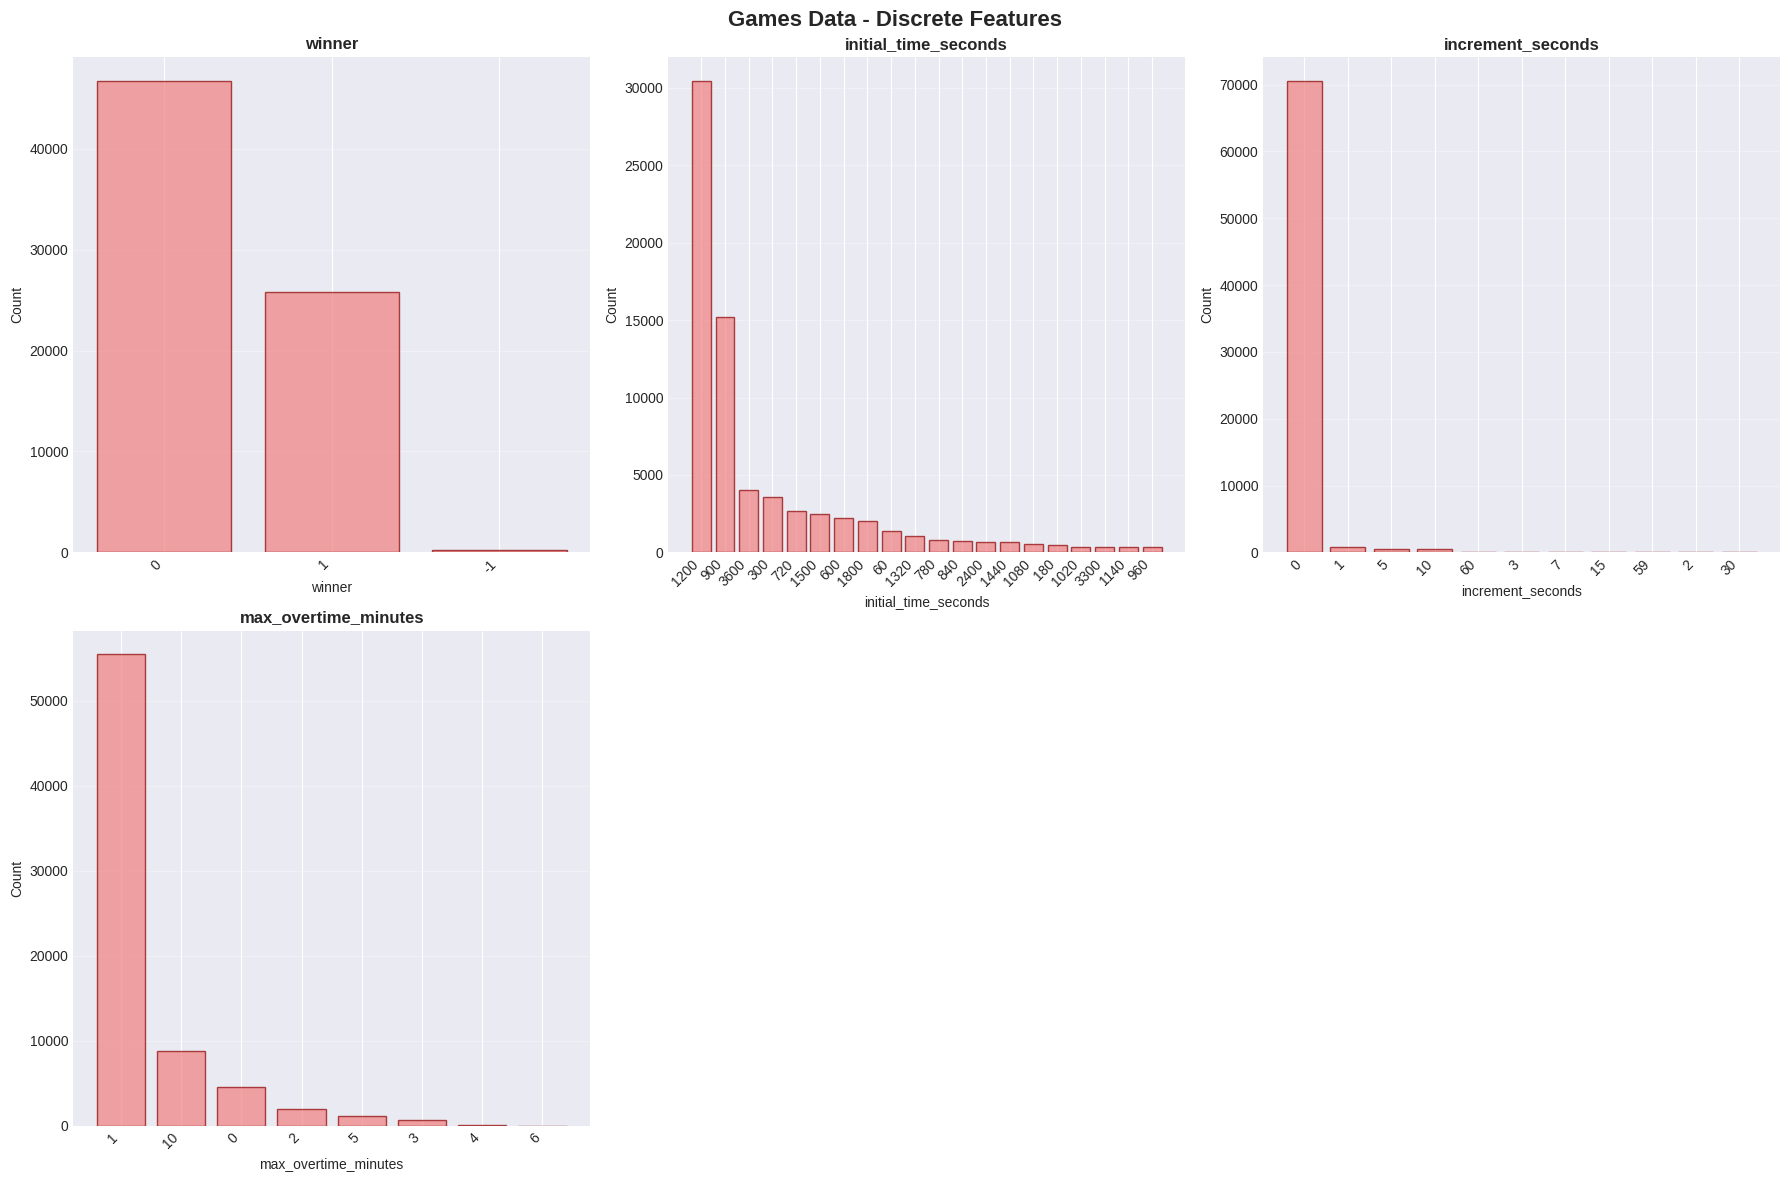

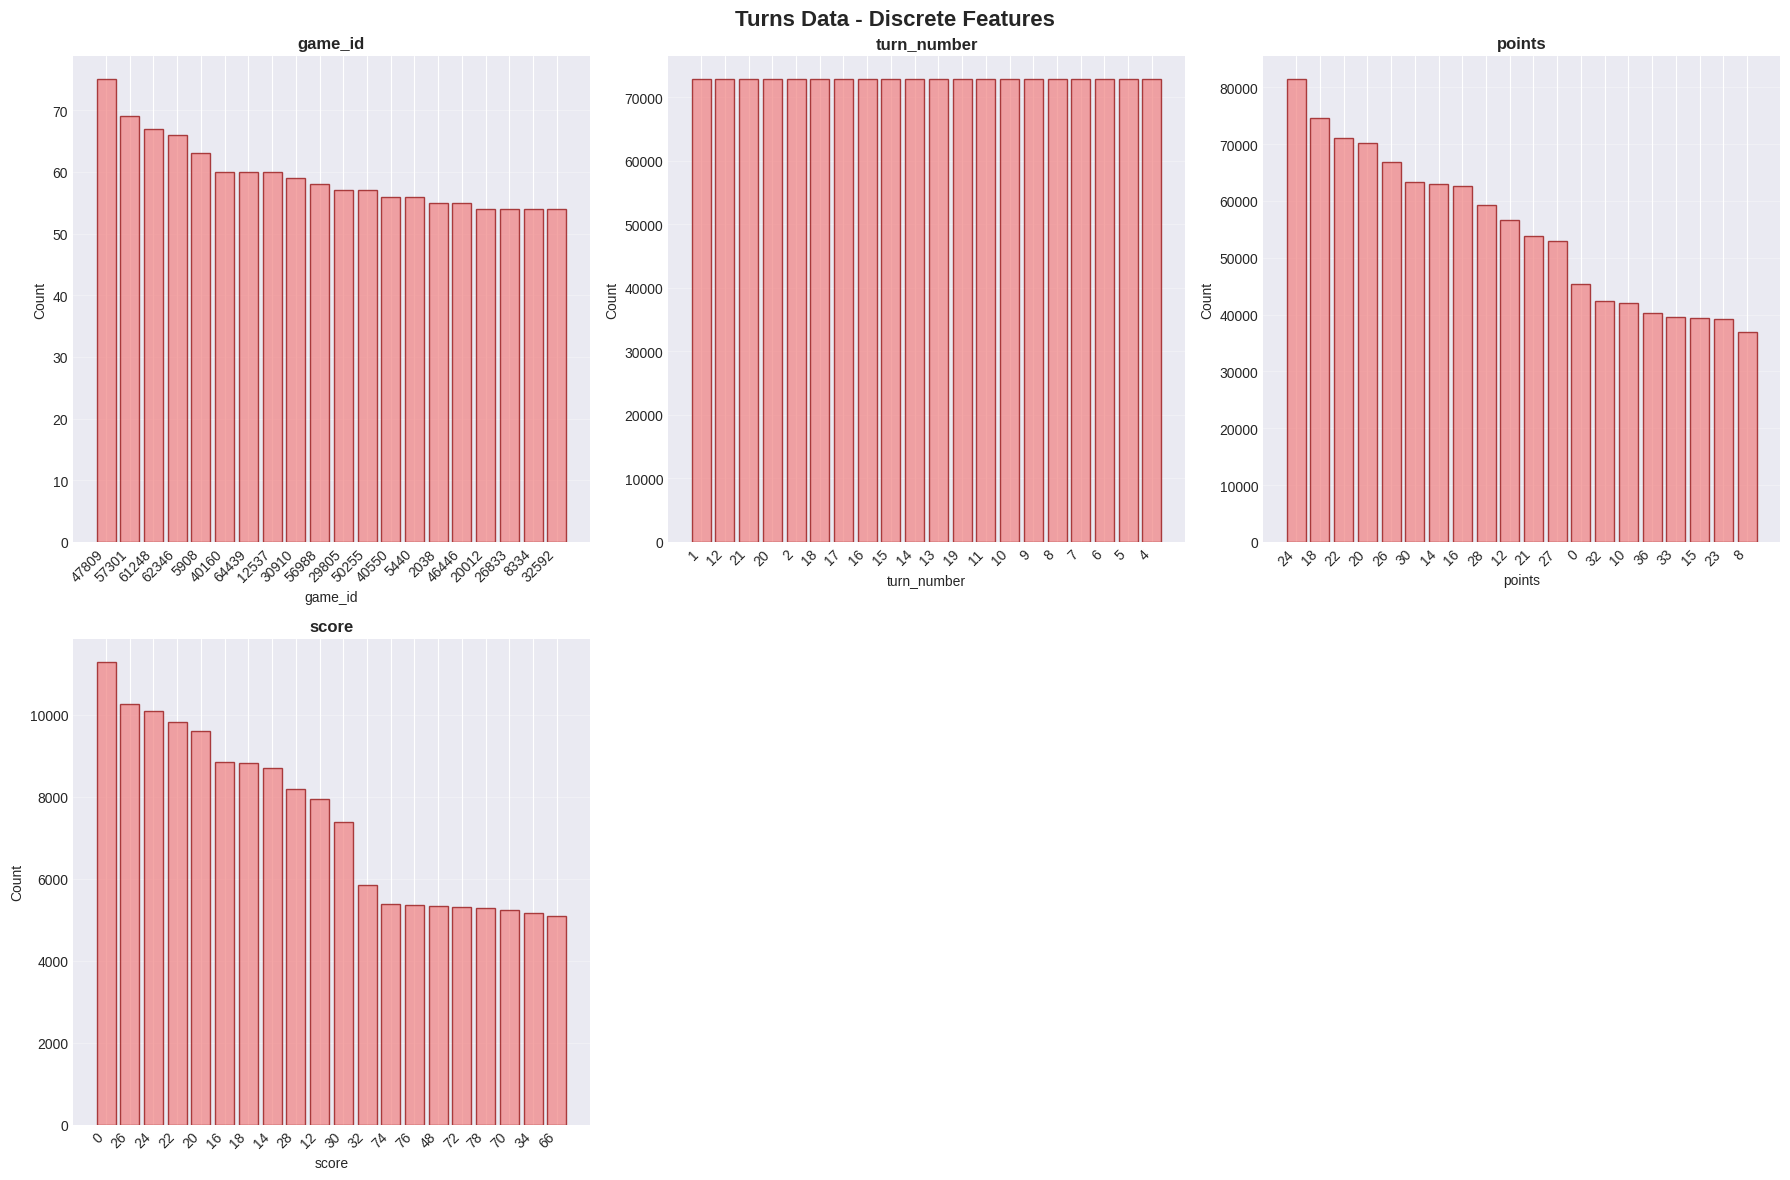

In [30]:
# Distribution analysis for discrete features
def plot_discrete_distributions(df, features, title, max_features=6):
    """Plot distributions for discrete features"""
    n_features = min(len(features), max_features)
    if n_features == 0:
        return
        
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, feature in enumerate(features[:max_features]):
        ax = axes[i]
        
        # Bar plot for discrete values
        value_counts = df[feature].value_counts().head(20)  # Top 20 values
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                     color='lightcoral', alpha=0.7, edgecolor='darkred')
        ax.set_title(f'{feature}', fontweight='bold')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
    
    # Hide unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot discrete distributions
plot_discrete_distributions(loader.train_df, train_disc, "Training Data - Discrete Features")
plot_discrete_distributions(loader.games_df, games_disc, "Games Data - Discrete Features")
plot_discrete_distributions(loader.turns_df, turns_disc, "Turns Data - Discrete Features")


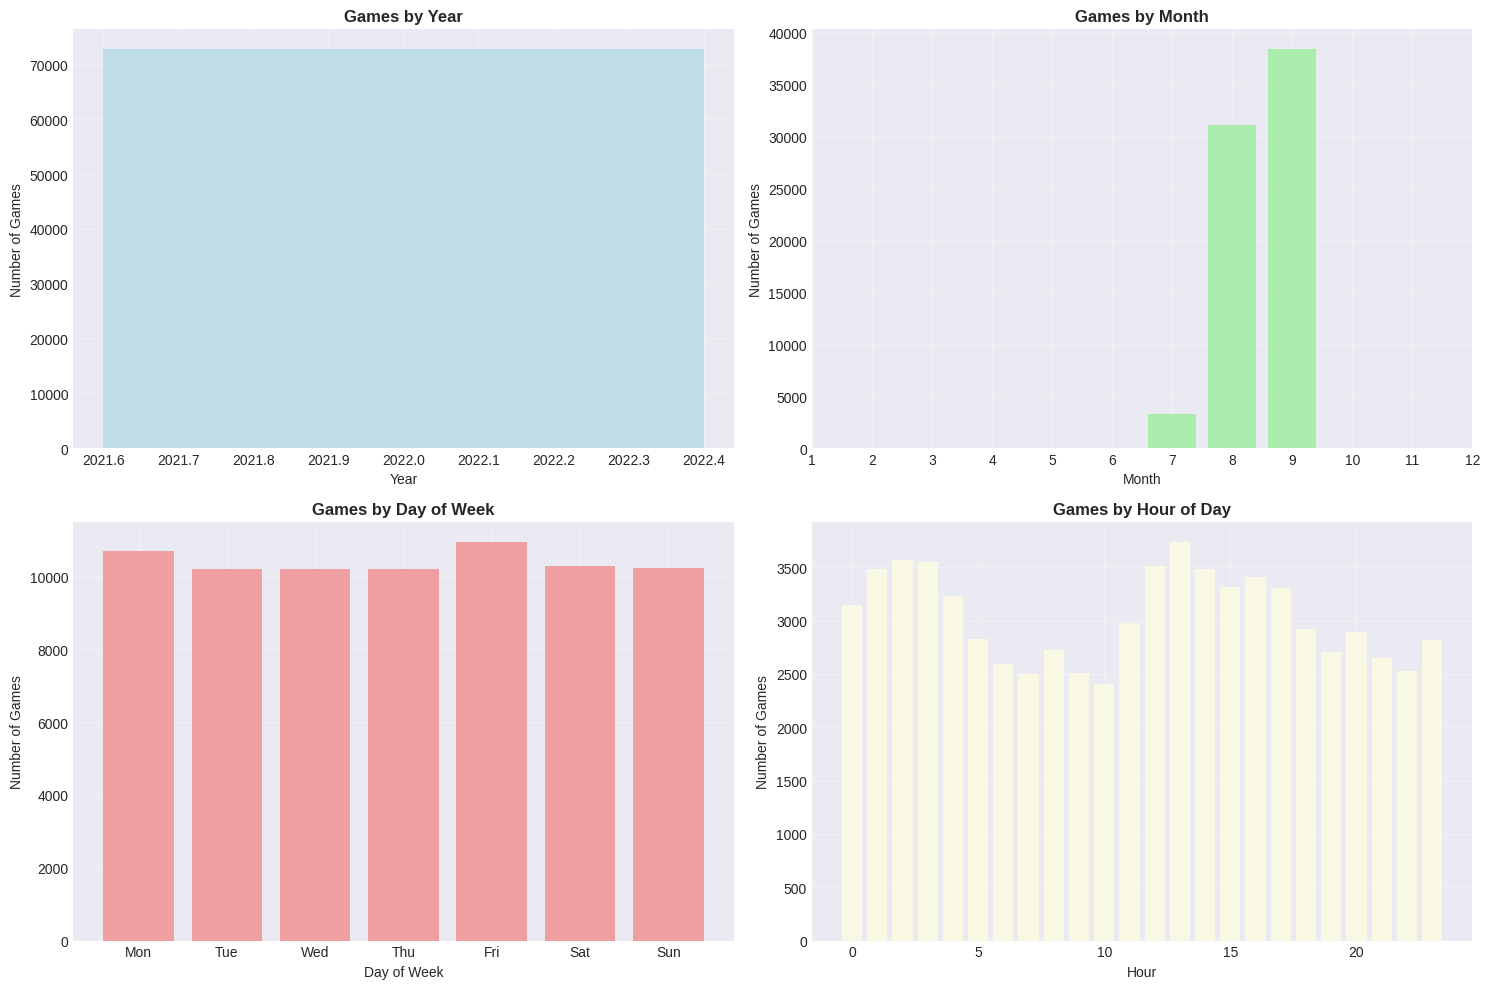

In [31]:
# Time series analysis for games data
loader.games_df['created_at'] = pd.to_datetime(loader.games_df['created_at'])

# Extract time features
loader.games_df['year'] = loader.games_df['created_at'].dt.year
loader.games_df['month'] = loader.games_df['created_at'].dt.month
loader.games_df['day_of_week'] = loader.games_df['created_at'].dt.dayofweek
loader.games_df['hour'] = loader.games_df['created_at'].dt.hour

# Plot time-based distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Year distribution
year_counts = loader.games_df['year'].value_counts().sort_index()
axes[0,0].bar(year_counts.index, year_counts.values, color='lightblue', alpha=0.7)
axes[0,0].set_title('Games by Year', fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Games')
axes[0,0].grid(True, alpha=0.3)

# Month distribution
month_counts = loader.games_df['month'].value_counts().sort_index()
axes[0,1].bar(month_counts.index, month_counts.values, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Games by Month', fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Number of Games')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].grid(True, alpha=0.3)

# Day of week distribution
dow_counts = loader.games_df['day_of_week'].value_counts().sort_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1,0].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], 
              color='lightcoral', alpha=0.7)
axes[1,0].set_title('Games by Day of Week', fontweight='bold')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Number of Games')
axes[1,0].set_xticks(range(7))
axes[1,0].set_xticklabels(dow_labels)
axes[1,0].grid(True, alpha=0.3)

# Hour distribution
hour_counts = loader.games_df['hour'].value_counts().sort_index()
axes[1,1].bar(hour_counts.index, hour_counts.values, color='lightyellow', alpha=0.7)
axes[1,1].set_title('Games by Hour of Day', fontweight='bold')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Number of Games')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 4: Identify Correlations


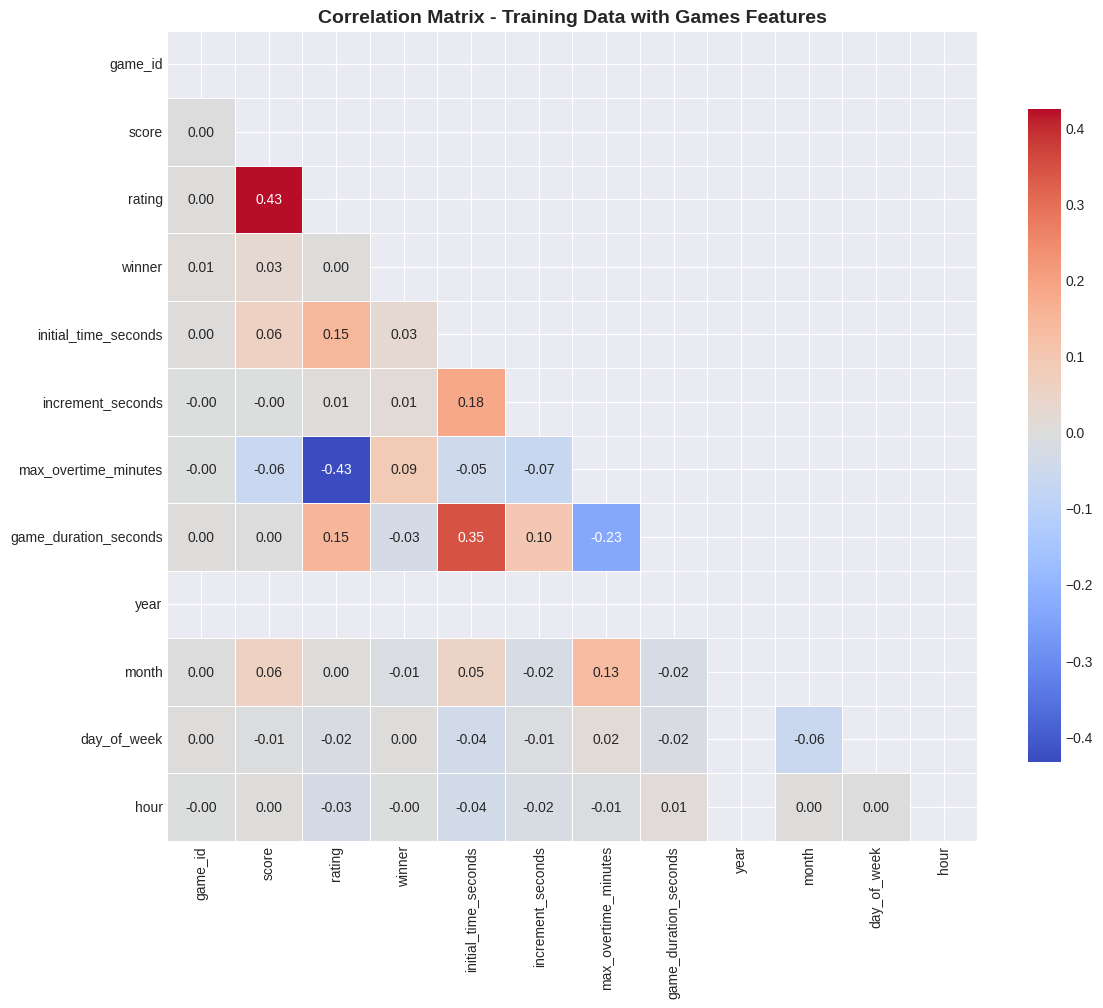


STRONG CORRELATIONS (|r| > 0.5):


In [ ]:
# Step 4: Correlation Analysis
# Merge training data with games data for correlation analysis
merged_df = loader.train_df.merge(loader.games_df, on='game_id', how='left')

# Select numeric columns for correlation
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix - Training Data with Games Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

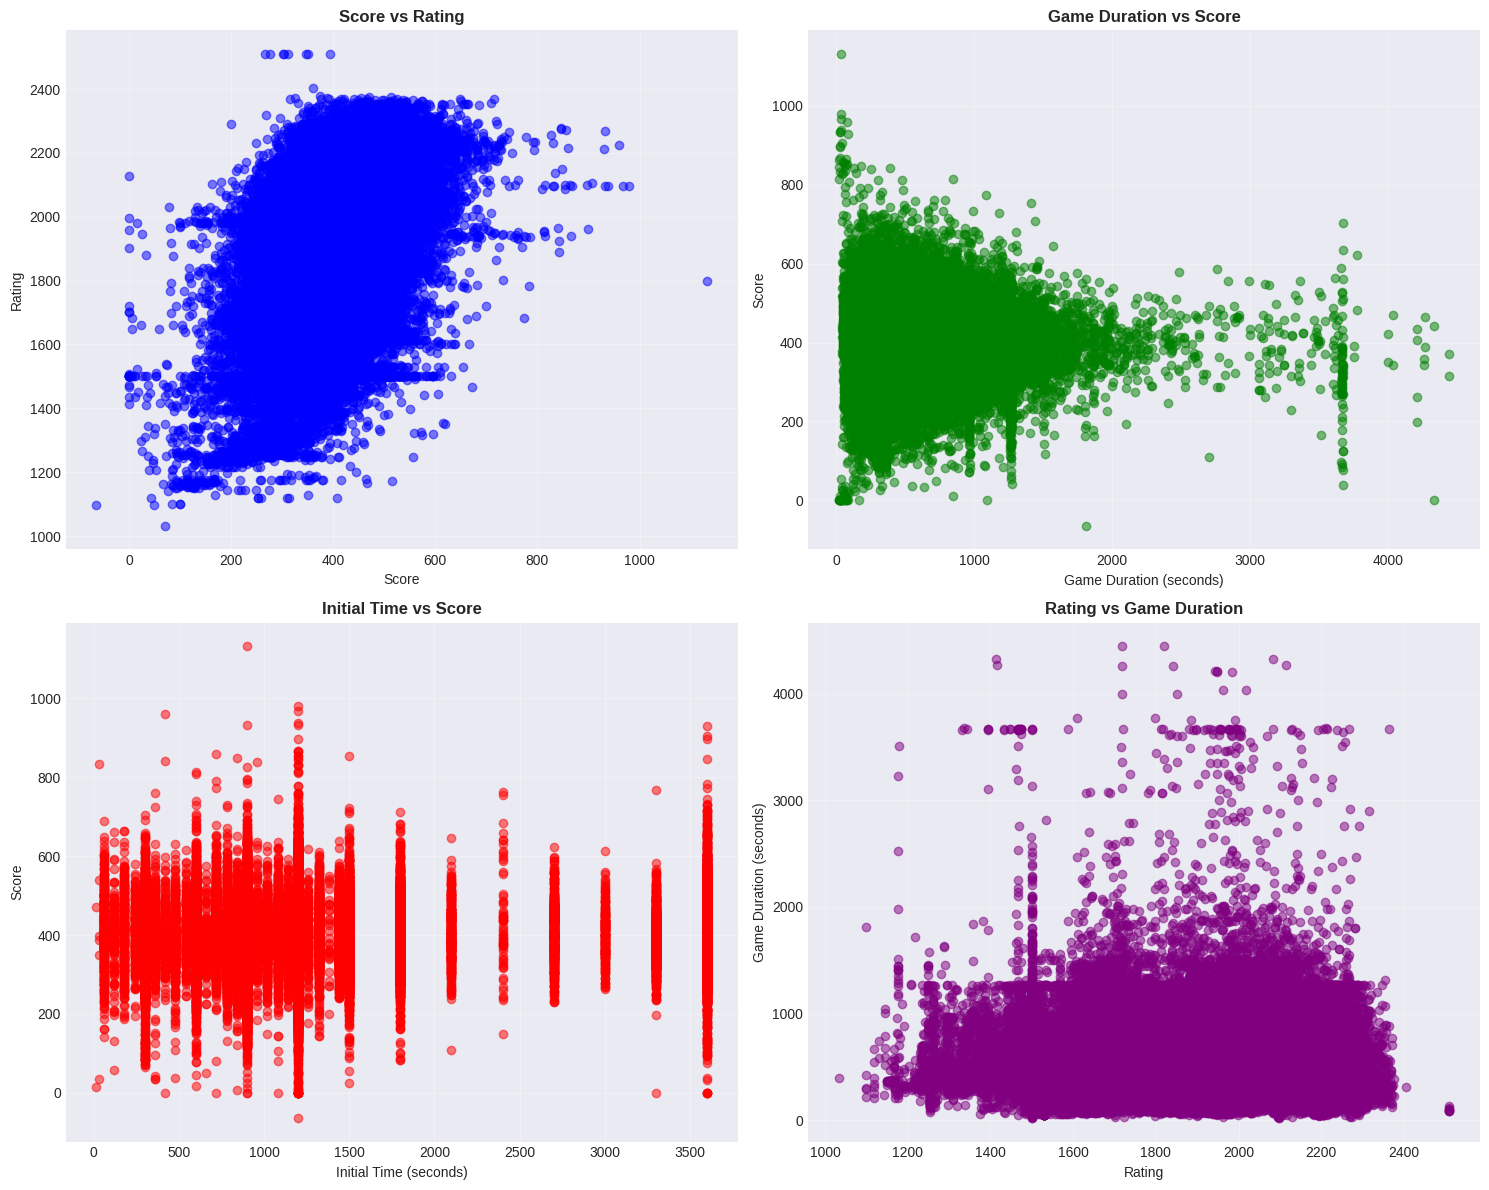

In [33]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Score vs Rating
axes[0,0].scatter(merged_df['score'], merged_df['rating'], alpha=0.5, color='blue')
axes[0,0].set_xlabel('Score')
axes[0,0].set_ylabel('Rating')
axes[0,0].set_title('Score vs Rating', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Game Duration vs Score
axes[0,1].scatter(merged_df['game_duration_seconds'], merged_df['score'], alpha=0.5, color='green')
axes[0,1].set_xlabel('Game Duration (seconds)')
axes[0,1].set_ylabel('Score')
axes[0,1].set_title('Game Duration vs Score', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Initial Time vs Score
axes[1,0].scatter(merged_df['initial_time_seconds'], merged_df['score'], alpha=0.5, color='red')
axes[1,0].set_xlabel('Initial Time (seconds)')
axes[1,0].set_ylabel('Score')
axes[1,0].set_title('Initial Time vs Score', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Rating vs Game Duration
axes[1,1].scatter(merged_df['rating'], merged_df['game_duration_seconds'], alpha=0.5, color='purple')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Game Duration (seconds)')
axes[1,1].set_title('Rating vs Game Duration', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [34]:
# Categorical correlation analysis using chi-square test
from scipy.stats import chi2_contingency

def chi_square_test(df, cat1, cat2):
    """Perform chi-square test for categorical variables"""
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value, contingency_table

print("\nCATEGORICAL CORRELATION ANALYSIS:")
print("=" * 60)

# Test correlations between categorical variables
categorical_pairs = [
    ('time_control_name', 'rating_mode'),
    ('lexicon', 'rating_mode'),
    ('game_end_reason', 'rating_mode')
]

for cat1, cat2 in categorical_pairs:
    if cat1 in merged_df.columns and cat2 in merged_df.columns:
        chi2, p_value, contingency_table = chi_square_test(merged_df, cat1, cat2)
        print(f"\n{cat1} vs {cat2}:")
        print(f"Chi-square statistic: {chi2:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
        print("\nContingency Table:")
        print(contingency_table.head())



CATEGORICAL CORRELATION ANALYSIS:

time_control_name vs rating_mode:
Chi-square statistic: 3623.1840
P-value: 0.0000
Significant: Yes

Contingency Table:
rating_mode        CASUAL  RATED
time_control_name               
blitz                 254   6530
rapid                 738   6074
regular             27720  59180
ultrablitz             36    288

lexicon vs rating_mode:
Chi-square statistic: 38052.2147
P-value: 0.0000
Significant: Yes

Contingency Table:
rating_mode  CASUAL  RATED
lexicon                   
CSW21         10094  50866
ECWL          13158      8
NSWL20            4      4
NWL20          5492  21194

game_end_reason vs rating_mode:
Chi-square statistic: 264.4311
P-value: 0.0000
Significant: Yes

Contingency Table:
rating_mode         CASUAL  RATED
game_end_reason                  
CONSECUTIVE_ZEROES     172    194
RESIGNED               912   1656
STANDARD             27220  68168
TIME                   444   2054


## Step 5: Spot Outliers


In [35]:
# Step 5: Outlier Detection
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_percentile(df, column, lower_percentile=1, upper_percentile=99):
    """Detect outliers using percentile method"""
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers in key continuous features
continuous_features = ['score', 'rating', 'game_duration_seconds', 'initial_time_seconds']

print("OUTLIER ANALYSIS:")
print("=" * 60)

outlier_summary = []
for feature in continuous_features:
    if feature in merged_df.columns:
        outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(merged_df, feature)
        outliers_perc, lower_perc, upper_perc = detect_outliers_percentile(merged_df, feature)
        
        outlier_count_iqr = len(outliers_iqr)
        outlier_count_perc = len(outliers_perc)
        total_count = len(merged_df)
        
        outlier_summary.append({
            'feature': feature,
            'outliers_iqr': outlier_count_iqr,
            'outliers_percentile': outlier_count_perc,
            'outlier_pct_iqr': (outlier_count_iqr / total_count) * 100,
            'outlier_pct_perc': (outlier_count_perc / total_count) * 100
        })
        
        print(f"\n{feature.upper()}:")
        print(f"  IQR Method: {outlier_count_iqr} outliers ({outlier_count_iqr/total_count*100:.2f}%)")
        print(f"  Percentile Method: {outlier_count_perc} outliers ({outlier_count_perc/total_count*100:.2f}%)")
        print(f"  IQR bounds: [{lower_iqr:.2f}, {upper_iqr:.2f}]")
        print(f"  Percentile bounds: [{lower_perc:.2f}, {upper_perc:.2f}]")

# Create outlier summary dataframe
outlier_df = pd.DataFrame(outlier_summary)
print(f"\nOUTLIER SUMMARY:")
print(outlier_df)


OUTLIER ANALYSIS:

SCORE:
  IQR Method: 1944 outliers (1.93%)
  Percentile Method: 1986 outliers (1.97%)
  IQR bounds: [212.50, 584.50]
  Percentile bounds: [217.00, 585.00]

RATING:
  IQR Method: 1 outliers (0.00%)
  Percentile Method: 1980 outliers (1.96%)
  IQR bounds: [1070.00, 2654.00]
  Percentile bounds: [1384.00, 2279.00]

GAME_DURATION_SECONDS:
  IQR Method: 3482 outliers (3.45%)
  Percentile Method: 2016 outliers (2.00%)
  IQR bounds: [-305.80, 1205.07]
  Percentile bounds: [95.20, 1472.20]

INITIAL_TIME_SECONDS:
  IQR Method: 18848 outliers (18.69%)
  Percentile Method: 882 outliers (0.87%)
  IQR bounds: [450.00, 1650.00]
  Percentile bounds: [240.00, 3600.00]

OUTLIER SUMMARY:
                 feature  outliers_iqr  outliers_percentile  outlier_pct_iqr  \
0                  score          1944                 1986         1.928189   
1                 rating             1                 1980         0.000992   
2  game_duration_seconds          3482                 2016   

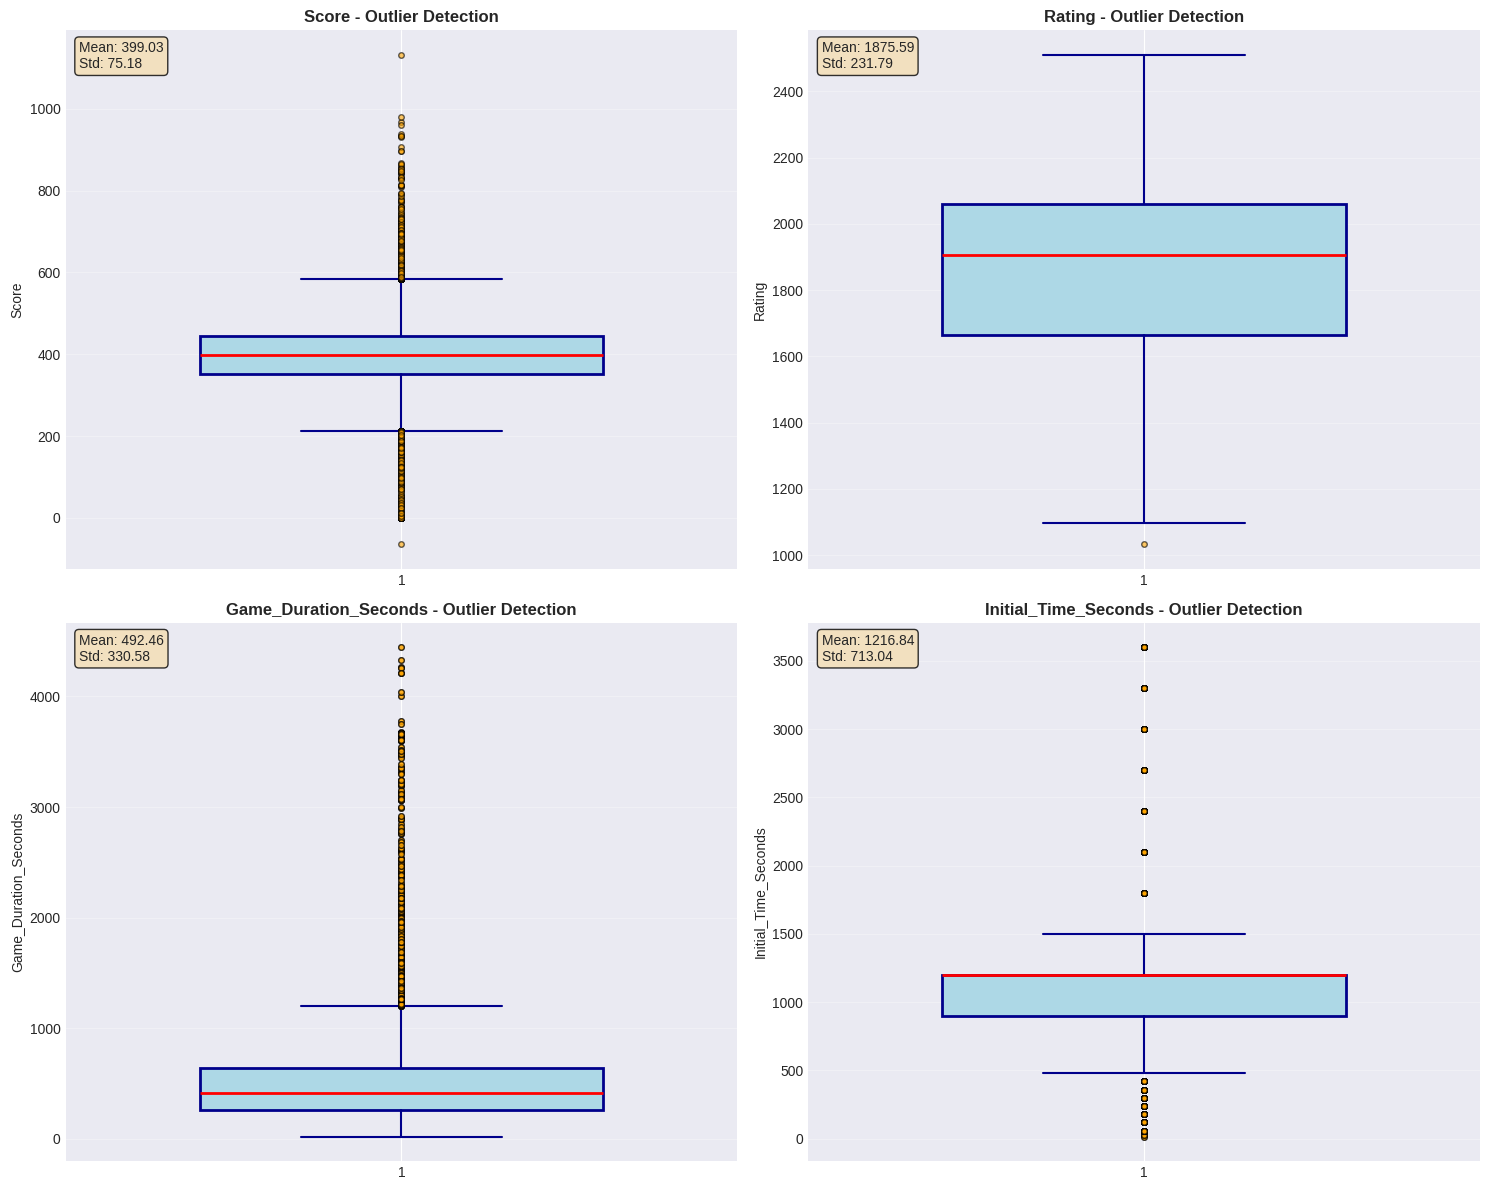

In [36]:
# Visualize outliers using box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, feature in enumerate(continuous_features):
    if feature in merged_df.columns:
        ax = axes[i//2, i%2]
        
        # Create box plot
        bp = ax.boxplot([merged_df[feature].dropna()], 
                        patch_artist=True,
                        widths=0.6,
                        boxprops=dict(facecolor='lightblue', color='darkblue', linewidth=2),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(color='darkblue', linewidth=1.5),
                        capprops=dict(color='darkblue', linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.6))
        
        ax.set_title(f'{feature.title()} - Outlier Detection', fontweight='bold')
        ax.set_ylabel(feature.title())
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add statistics
        mean_val = merged_df[feature].mean()
        std_val = merged_df[feature].std()
        ax.text(0.02, 0.98, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


In [37]:
# Analyze extreme outliers in scores and ratings
print("\nEXTREME OUTLIER ANALYSIS:")
print("=" * 60)

# Score outliers
score_outliers, _, _ = detect_outliers_percentile(merged_df, 'score', 0.5, 99.5)
print(f"\nScore Outliers (top/bottom 0.5%):")
print(f"Count: {len(score_outliers)}")
print("\nTop 10 highest scores:")
print(score_outliers.nlargest(10, 'score')[['nickname', 'score', 'rating', 'game_duration_seconds']])
print("\nTop 10 lowest scores:")
print(score_outliers.nsmallest(10, 'score')[['nickname', 'score', 'rating', 'game_duration_seconds']])

# Rating outliers
rating_outliers, _, _ = detect_outliers_percentile(merged_df, 'rating', 0.5, 99.5)
print(f"\nRating Outliers (top/bottom 0.5%):")
print(f"Count: {len(rating_outliers)}")
print("\nTop 10 highest ratings:")
print(rating_outliers.nlargest(10, 'rating')[['nickname', 'score', 'rating', 'game_duration_seconds']])
print("\nTop 10 lowest ratings:")
print(rating_outliers.nsmallest(10, 'rating')[['nickname', 'score', 'rating', 'game_duration_seconds']])

# Bot analysis in outliers
bot_outliers_score = score_outliers[score_outliers['nickname'].isin(['BetterBot', 'STEEBot', 'HastyBot', 'Super'])]
bot_outliers_rating = rating_outliers[rating_outliers['nickname'].isin(['BetterBot', 'STEEBot', 'HastyBot', 'Super'])]

print(f"\nBot Outliers:")
print(f"Score outliers (bots): {len(bot_outliers_score)}")
print(f"Rating outliers (bots): {len(bot_outliers_rating)}")



EXTREME OUTLIER ANALYSIS:

Score Outliers (top/bottom 0.5%):
Count: 1001

Top 10 highest scores:
       nickname  score  rating  game_duration_seconds
20531  HastyBot   1132    1798              40.340516
74889  HastyBot    980    2095              37.489997
25158  HastyBot    967    2095              37.570472
83733  HastyBot    960    2226              78.413299
76511  HastyBot    939    2095              40.118725
69868  HastyBot    933    2270              32.168173
92752  HastyBot    933    2095              26.723815
70992  HastyBot    930    2211              85.506565
64984   STEEBot    906    2107              46.643736
39237  HastyBot    898    1963              33.019524

Top 10 lowest scores:
               nickname  score  rating  game_duration_seconds
45665          Saadkhan    -64    1098            1811.330220
6796          CodeTitan      0    1500              69.939998
8275     Inandoutworker      0    1508            1094.868300
23501  mentalplayground      0    199